# Naive_bayes model on Bank Marketing Data Set

# Package Import Section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import time 
start = time.time()

# Reading data from CSV file

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
#data.to_excel( "bank.xlsx" )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
data.describe(include = 'object') #getting summary of categorical value

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Model - 3 : Naive Bayes Classifier  

# Train test split

First we identified the features with unknown values and we have dropped those rows. As 'default' feature has too many unknown later in the pipeline we ignored the feature.

In [5]:
cols = data.columns
num_cols = list(data._get_numeric_data().columns)
cat_col = list(set(cols) - set(num_cols) - set('y'))
cat_miss=[]
for i in cat_col:
    if "unknown" in data[i].unique():
        cat_miss.append(i)
cat_miss

['marital', 'job', 'housing', 'education', 'default', 'loan']

In [6]:
data_no_missing = data.loc[(data['education']!='unknown')&(data['marital']!='unknown')&(data['housing']!='unknown')
                       &(data['job']!='unknown')&(data['loan']!='unknown')]

In [7]:
X = data.iloc[:, 0:20]
y = data.iloc[:, 20]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,77,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,12,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,277,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,70,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,1181,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1


# Exploratory Data Analysis

# Categorical Variables Plots

First we have plotted bars with respect to the class labels. This confirms that we don't have any unknown values.

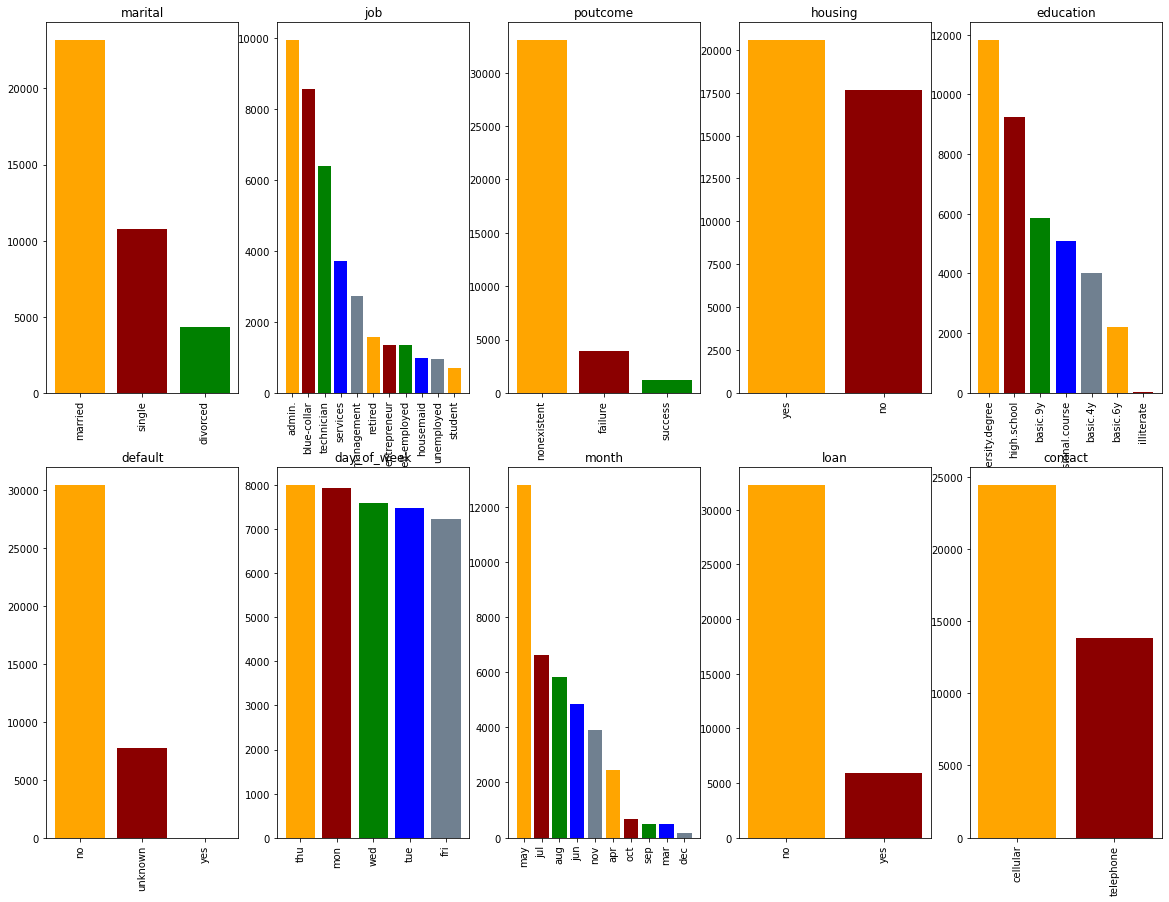

In [9]:
fig , axis = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

flag = 0

for i in cat_col:
    value_counts = data_no_missing[i].value_counts()
    trace_x = flag // 5
    trace_y = flag % 5
    x_pos = np.arange(0, len(value_counts))
    
    axis[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index
                              ,color=['orange', 'darkred', 'green', 'blue', 'slategray'])

    axis[trace_x, trace_y].set_title(i)
    
    for tick in axis[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    flag += 1

plt.show()
    

# Target Variable Countplot

<AxesSubplot:xlabel='count', ylabel='y'>

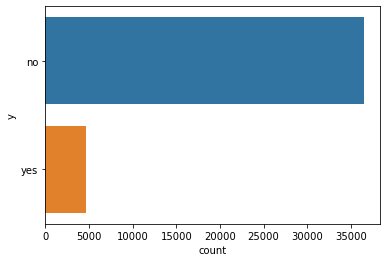

In [10]:
sns.countplot(y = 'y', data = data)

It it highly imbalanced data as we can viasualize from the plot. 

# Numerical Variable Plots

First we have plotted histograms for each Numerical Variables. From this plot we can easily identify the outliers.

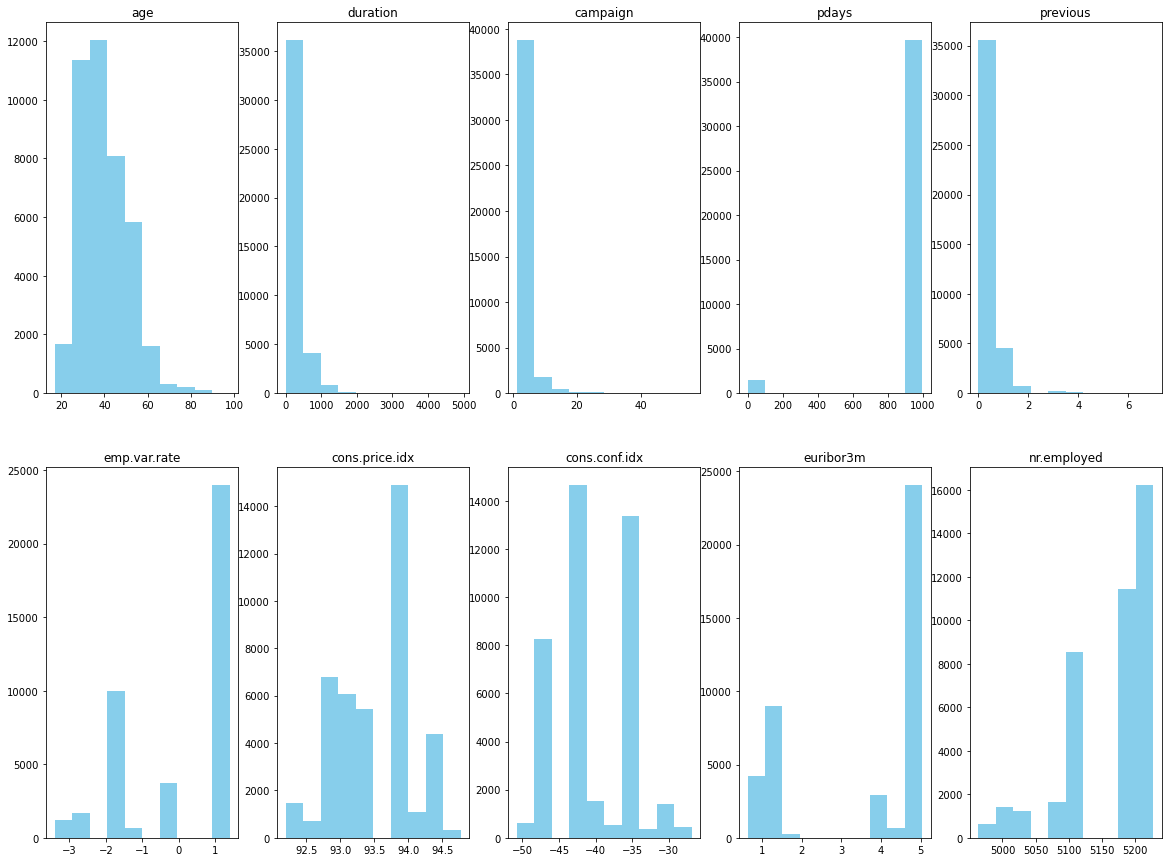

In [11]:
fig , axis = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

flag = 0

for i in num_cols:
    
    trace_x = flag // 5
    trace_y = flag % 5
    
    axis[trace_x, trace_y].hist(data[i],color = 'skyblue')

    axis[trace_x, trace_y].set_title(i)
    
    
    flag += 1

plt.show()

campaign, duration have outliers. and the histogram for pdays seems to be weird. We can interprete that, majority people were contacted for the first time. Next we will describe those categorical variables. 

In [12]:
data[['duration','campaign','pdays']].describe()

,duration,campaign,pdays
count,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454
std,259.279249,2.770014,186.910907
min,0.000000,1.000000,0.000000
25%,102.000000,1.000000,999.000000
50%,180.000000,2.000000,999.000000
75%,319.000000,3.000000,999.000000
max,4918.000000,56.000000,999.000000


- Surely Duration has outliers. Where the mean is lying under 300, the max value says 4918 seconds. So, later in the pipeline we will replace those outlier values with the mean. 

- Campaign also has outliers. So, we will also relace the column using the method mean. 

# Defining Data Preprocessing Steps & Building Model Pipeline

# Building ExperimentalTransformer  

Here we have transformed those rows which has outliers. Thresholds are set with respect to the description of these features. 

In [13]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class ExperimentalTransformer(BaseEstimator , TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, documents, y = None):
        return(self)
    
    def transform(self, X, y = None):
        
        X_dataset = X.copy()

        cam_mean = X_dataset['campaign'].mean()
        X_dataset.loc[X_dataset['campaign'] > 20, 'campaign'] = cam_mean 
        
        dur_mean = X_dataset['duration'].mean()
        X_dataset.loc[X_dataset['duration'] > 1500, 'duration'] = cam_mean
        
        return(X_dataset)

# Building ColumnTransformer

- Here we transformed the categorical columns using OneHotEncoder as the categorical variables are nominal. If they were ordinal we should have used LabelEncoder.  
- We dropped the default feature as it has huge amount of unknown data. 

In [14]:
numeric_transformer = Pipeline(steps = [ ('imputer', SimpleImputer(strategy = 'mean'))])
categorical_transformer = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

pre_process = ColumnTransformer(
    remainder = 'passthrough', transformers = [('num', numeric_transformer, num_cols),
                                              ('drop_columns1', 'drop', 'default'),
                                              ('cat', categorical_transformer, cat_col)])

# Bulding Pipeline

Here we combined 3 steps one by one. first, ExperimentalTransformer then Pre_processing and after that we used the model in the pipeline.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
model_pipeline = Pipeline(steps = [('experimental',ExperimentalTransformer()),
                                   ('pre_processing',pre_process), ('naive_bayes', GaussianNB())])


# Fitting the model with train data

In [16]:
%load_ext memory_profiler
from memory_profiler import profile 

%memit
model_pipeline.fit(X_train, y_train)

peak memory: 192.57 MiB, increment: 0.02 MiB


Pipeline(steps=[('experimental', ExperimentalTransformer()),
                ('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('drop_columns1', 'drop',
                                                  'default'),
                                              

# Prediction using test data 

In [17]:
y_pred = model_pipeline.predict(X_test)

# Testing Our Model

In [18]:
new = pd.DataFrame()
new['test'] = y_test
new['pred'] = y_pred

new

,test,pred
32884,no,no
3169,no,no
32206,no,no
9403,no,no
14020,no,no
...,...,...
15908,no,no
28222,no,yes
14194,no,no
19764,no,no


# Performance Measure

Detailed performance measure is available in the link. 

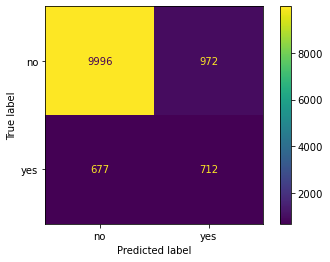

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
f = open("naive_bayes.txt", "w")

accuracy_score = metrics.accuracy_score(y_test, y_pred)

con_matrix = confusion_matrix(y_test,y_pred, labels=['no','yes'])

report_matrix = classification_report(y_test, y_pred,labels=['no','yes'])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_pipeline,X_test,y_test,display_labels=['no','yes'])
plt.savefig("naive_bays_confusion_matrix")
plt.close(fig)


One interesting fact, if we drop all the categorical variables, the accuracy of Naive Bays is imporoving

In [20]:
end = time.time()

print("Total time taken:",(end-start),"seconds")

Total time taken: 8.708638906478882 seconds
